#SVM实现，验证集a9atest.txt只有122个特征，手动在第一行添加了123：0    代码运行速度比较慢

In [1]:
from sklearn.datasets import load_svmlight_file
from numpy import *
from sklearn.model_selection import train_test_split
data=load_svmlight_file(r'D:\a9a.txt')#读取训练集数据
datat=load_svmlight_file(r'D:\a9atest.txt')#读取验证集数据
X=data[0]
y=data[1]
Xt=datat[0]
yt=datat[1]
S=zeros((32561,123))
S=mat(S)
X=X+S
X=X.getA()
print(Xt.shape)
c=ones(X.shape[0])
X=insert(X, 0, values=c, axis=1)#向训练集插入一列1
X=mat(X)

St=zeros((16281,123))
St=mat(St)
Xt=Xt+St
Xt=Xt.getA()
print(Xt.shape)
ct=ones(Xt.shape[0])
Xt=insert(Xt, 0, values=ct, axis=1)#向验证集插入一列1
Xt=mat(Xt)

y=y.reshape(32561,1)
y=mat(y)
yt=yt.reshape(16281,1)
yt=mat(yt)

(16281, 123)
(16281, 123)


In [3]:
def lossfunction(X,y,W,C):#计算loss
    loss=0
    m=X.shape[0]
    for j in range(m):
        if y[j]*(X[j]*W.transpose())<1:
            loss=loss+1
    cost=loss*C+1/2*W*W.transpose()
    return cost/m
def gradientfunction(X,y,W,C):#计算梯度
    k=0
    S=zeros((1,124))
    S=mat(S)
    while k<100:#以100为批量size
        i=random.randint(0,X.shape[0])
        fx=1-y[i]*(X[i]*W.transpose())
        if fx>=0:
            G=-y[i]*X[i]
        else:
            G=0
        S=S+G
        k=k+1
    gradient=W+C*S
    return gradient
def preditscore(X,y,W):#计算准确率
    m=X.shape[0]
    number=0
    for j in range(m):
        if y[j]*(X[j]*W.transpose())>=1:
            number=number+1
    score=number/m
    print(number)
    return score

In [7]:
#SGD
W1=zeros((1,124))#将参数全部初始化为0
W1=mat(W1)
lamda1=0.003#lamda为学习率
loss_validation1=[]#存储验证集的loss
ix1=[]#存储迭代次数
k1=0
C1=0.1
while 1:
    ix1.append(k1)
    lossv=0
    #计算验证集的loss值
    lossv=lossfunction(Xt,yt,W1,C1)
    lossv=lossv.getA()
    loss_validation1.append(lossv[0][0])
    G1=gradientfunction(X,y,W1,C1)
    W1=W1-lamda1*G1#更新模型参数
    if lossv<0.01 or k1>200:#若loss值小于0.01或者迭代次数大于100则停止
        break
    k1=k1+1

In [13]:
#NAG
W2=zeros((1,124))#将参数全部初始化为0
W2=mat(W2)
V2=zeros((1,124))#将参数全部初始化为0
V2=mat(V2)
loss_validation2=[]#存储验证集的loss
ix2=[]#存储迭代次数
k2=0
C2=0.1
n2=0.01
r2=0.9
while 1:
    ix2.append(k2)
    lossv=0
    #计算验证集的loss值
    lossv=lossfunction(Xt,yt,W2,C2)
    lossv=lossv.getA()
    loss_validation2.append(lossv[0][0])
    W12=W2-r2*V2
    G2=gradientfunction(X,y,W12,C2)
    V2=r2*V2+n2*G2
    W2=W2-V2#更新模型参数
    if lossv<0.01 or k2>200:#若loss值小于0.01或者迭代次数大于100则停止
        break
    k2=k2+1

In [20]:
#RMSProp
W3=zeros((1,124))#将参数全部初始化为0
W3=mat(W3)
Gt3=zeros((1,124))#将参数全部初始化为0
Gt3=mat(Gt3)
n3=0.001#lamda为学习率
loss_validation3=[]#存储验证集的loss
ix3=[]#存储迭代次数
k3=0
C3=0.1
r3=0.9
e3=1e-8
while 1:
    ix3.append(k3)
    lossv=0
    #计算验证集的loss值
    lossv=lossfunction(Xt,yt,W3,C3)
    lossv=lossv.getA()
    loss_validation3.append(lossv[0][0])
    G3=gradientfunction(X,y,W3,C3)
    Gt3=r3*Gt3+(1-r3)*multiply(G3,G3)
    W3=W3-multiply(n3/sqrt(Gt3+e3),G3)#更新模型参数
    if lossv<0.01 or k3>200:#若loss值小于0.01或者迭代次数大于100则停止
        break
    k3=k3+1

In [47]:
#AdaDelte
W4=zeros((1,124))#将参数全部初始化为0
W4=mat(W4)
Gt4=zeros((1,124))#将参数全部初始化为0
Gt4=mat(Gt4)
d4=zeros((1,124))#将参数全部初始化为0
d4=mat(d4)
loss_validation4=[]#存储验证集的loss
ix4=[]#存储迭代次数
k4=0
C4=0.1
r4=0.95
e4=1e-8
while 1:
    ix4.append(k4)
    lossv=0
    #计算验证集的loss值
    lossv=lossfunction(Xt,yt,W4,C4)
    lossv=lossv.getA()
    loss_validation4.append(lossv[0][0])
    G4=gradientfunction(X,y,W4,C4)
    Gt4=r4*Gt4+(1-r4)*multiply(G4,G4)
    dw4=-multiply(sqrt(d4+e4)/sqrt(Gt4+e4),G4)
    W4=W4+dw4#更新模型参数
    d4=r4*d4+(1-r4)*multiply(dw4,dw4)
    if lossv<0.01 or k4>200:#若loss值小于0.01或者迭代次数大于100则停止
        break
    k4=k4+1

In [40]:
#Adam
W5=zeros((1,124))#将参数全部初始化为0
W5=mat(W5)
m5=zeros((1,124))#将参数全部初始化为0
m5=mat(m5)
Gt5=zeros((1,124))#将参数全部初始化为0
Gt5=mat(Gt5)
loss_validation5=[]#存储验证集的loss
ix5=[]#存储迭代次数
k5=0
C5=0.1
B5=0.9
r5=0.999
n5=0.001
e5=1e-8
while 1:
    ix5.append(k5)
    lossv=0
    #计算验证集的loss值
    lossv=lossfunction(Xt,yt,W5,C5)
    lossv=lossv.getA()
    loss_validation5.append(lossv[0][0])
    G5=gradientfunction(X,y,W5,C5)
    m5=B5*m5+(1-B5)*G5
    Gt5=r5*Gt5+(1-r5)*multiply(G5,G5)
    a5=n5*sqrt(1-r5)/(1-B5)
    W5=W5-a5*m5/sqrt(Gt5+e5)#更新模型参数
    if lossv<0.01 or k5>200:#若loss值小于0.01或者迭代次数大于100则停止
        break
    k5=k5+1

Text(0,0.5,'loss')

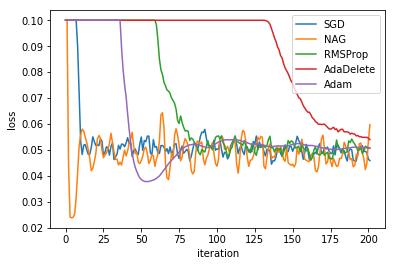

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ix1,loss_validation1,label='SGD')
plt.plot(ix2,loss_validation2,label='NAG')
plt.plot(ix3,loss_validation3,label='RMSProp')
plt.plot(ix4,loss_validation4,label='AdaDelete')
plt.plot(ix5,loss_validation5,label='Adam')
plt.legend(loc='upper right')
plt.xlabel('iteration')
plt.ylabel('loss')